In [35]:
from IPython.display import IFrame

# Path to the PDF file
pdf_path ='naca0015_extracted_pages.pdf'

# Display the PDF using IFrame
IFrame(pdf_path, width='100%', height=600)


In [1]:
from PyPDF2 import PdfReader, PdfWriter

# Define the function to extract specific pages from a PDF and save to a new PDF file
def extract_pages(input_pdf, output_pdf, start_page, end_page):
    reader = PdfReader(input_pdf)
    writer = PdfWriter()

    # PyPDF2 uses 0-based indexing for getting pages
    for i in range(start_page - 1, end_page):
        writer.add_page(reader.pages[i])
    
    with open(output_pdf, 'wb') as f:
        writer.write(f)

# Call the function with the specific page range
input_pdf_path = 'sandia.pdf'
output_pdf_path = 'naca0015_extracted_pages.pdf'
extract_pages(input_pdf_path, output_pdf_path, 31, 43)


In [36]:
import pytesseract
from PIL import Image
import pdf2image
import pandas as pd
import re

# Convert PDF pages to images
pages = pdf2image.convert_from_path('naca0015_extracted_pages.pdf', dpi=200)

# Initialize OCR and DataFrame
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
df = pd.DataFrame(columns=['Section', 'Angle', 'CL', 'CD'])

# Helper function to clean and split the OCR text into columns
def clean_and_split(text):
    # Split the text into lines and initialize an empty list to hold cleaned lines
    lines = text.split('\n')
    cleaned_lines = []
    
    # Regex pattern for matching lines with the format: '0', 'integer', 'CL', 'CD'
    line_pattern = re.compile(r'^(\d+)\s+(-?\d+)\s+([-+]?\d*\.\d+|\d+)\s+([-+]?\d*\.\d+|\d+)')
    
    # Process each line
    for line in lines:
        # Check if the line matches the pattern
        if line_pattern.match(line):
            # Split the line into its components and append to the list
            cleaned_lines.append(line.split())
    
    return cleaned_lines

# Process each page for text.
for page in pages:
    # OCR the page
    text = pytesseract.image_to_string(page, lang='eng')
    
    # Clean and split text into columns
    lines = clean_and_split(text)
    
    # Process each line
    for line in lines:
        if line:
            # Assign the first column as section based on the defined states
            section = None
            if line[0] == '0':
                # We are in the dataset, ready for next line
                section = 'Continuation'
            elif line[0] == '1':
                # The dataset is finished, next state is a space
                section = 'End'
            else:
                # It's a new section
                section = 'New Section'
            
            # Append the line as a new row in the DataFrame
            df = df.append({
                'Section': section,
                'Angle': int(line[1]),
                'CL': float(line[2]),
                'CD': float(line[3])
            }, ignore_index=True)

# Since the data could be large, let's save the DataFrame as a CSV for now
df.to_csv('extracted_data.csv', index=False)

# Display the first few rows of the DataFrame
df.head()


AttributeError: 'DataFrame' object has no attribute 'append'

In [4]:
import pytesseract
from PIL import Image
import pdf2image
import pandas as pd
import re

# Convert PDF pages to images
pages = pdf2image.convert_from_path('naca0015_extracted_pages.pdf', dpi=200)

# Initialize OCR and DataFrame
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
data = []  # Initialize an empty list to collect data

# Regex pattern for matching lines with the format: '0', 'integer', 'CL', 'CD'
line_pattern = re.compile(r'^(\d+)\s+(-?\d+)\s+([-+]?\d*\.\d+|\d+)\s+([-+]?\d*\.\d+|\d+)')

# Process each page for text
for page in pages:
    # OCR the page
    text = pytesseract.image_to_string(page, lang='eng')
    
    # Split the text into lines
    lines = text.split('\n')
    
    # Process each line
    for line in lines:
        # Check if the line matches the pattern
        match = line_pattern.match(line)
        if match:
            # Extract data from the matched line
            section, angle, cl, cd = match.groups()
            section_state = 'New Section' if section.strip() else 'Continuation'
            data.append({
                'Section': section_state,
                'Angle': int(angle),
                'CL': float(cl),
                'CD': float(cd)
            })

# Convert the list of data to a DataFrame
df = pd.DataFrame(data, columns=['Section', 'Angle', 'CL', 'CD'])

# Save the DataFrame as a CSV file
df.to_csv('extracted_data.csv', index=False)

# Display the first few rows of the DataFrame
df.head()


Section    Angle          CL         CD
0  New Section  1520000   1721.0000   1770.000
1  New Section   300000  73300.0000  20156.000
2  New Section    50000  75180.0000  20181.000
3  New Section    70000  26760.0000  20214.000
4  New Section  1600000      0.2364      0.196

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Section  23 non-null     object 
 1   Angle    23 non-null     int64  
 2   CL       23 non-null     float64
 3   CD       23 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 868.0+ bytes


In [3]:
import pytesseract
from PIL import Image
import pdf2image
import pandas as pd

# Konfigurieren Sie den Pfad zu pytesseract, wenn er nicht bereits im PATH ist
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Konvertiere die PDF-Seiten in Bilder
pages = pdf2image.convert_from_path('naca0015_extracted_pages.pdf', dpi=200)

# Liste zum Speichern der erkannten Textzeilen
text_rows = []

# OCR und Verarbeitung jeder Seite
for page in pages:
    # OCR der Seite, um Text zu extrahieren
    text = pytesseract.image_to_string(page, lang='eng')
    
    # Teile den Text in Zeilen und füge jede Zeile der Liste hinzu
    lines = text.split('\n')
    for line in lines:
        text_rows.append(line.split('\t'))  # Trennen bei Tabstopps

# Erstelle einen DataFrame aus der Liste der Textzeilen
df = pd.DataFrame(text_rows)

# Zeige den erstellten DataFrame
df.head()


0
0           Table 3. (cont)
1                          
2   0 125.0000 27600 1.3500
3                          
4  0 130.9000 -.8500 1.2250

In [12]:
df


0
0             Table 3. (cont)
1                            
2     0 125.0000 27600 1.3500
3                            
4    0 130.9000 -.8500 1.2250
..                        ...
831                          
832         nlo elolaio clo o
833                          
834                        40
835                          

[836 rows x 1 columns]

In [13]:
# DataFrame als CSV-Datei speichern
df.to_csv('naca0015_180_daten.csv', index=False)


In [4]:
import pytesseract
from PIL import Image
import pdf2image
import pandas as pd

# Konfigurieren Sie den Pfad zu pytesseract, wenn er nicht bereits im PATH ist
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Konvertiere die PDF-Seiten in Bilder mit höherer Auflösung
pages = pdf2image.convert_from_path('naca0015_extracted_pages.pdf', dpi=300)  # Erhöhte DPI-Einstellung

# Liste zum Speichern der erkannten Textzeilen
text_rows = []

# OCR und Verarbeitung jeder Seite
for page in pages:
    # OCR der Seite, um Text zu extrahieren
    text = pytesseract.image_to_string(page, lang='eng')
    
    # Teile den Text in Zeilen und füge jede Zeile der Liste hinzu
    lines = text.split('\n')
    for line in lines:
        text_rows.append(line.split('\t'))  # Trennen bei Tabstopps

# Erstelle einen DataFrame aus der Liste der Textzeilen
df = pd.DataFrame(text_rows)

# Zeige den erstellten DataFrame
df.head()


0
0            Table 3. (cont)
1                           
2    0 125-0000 27600 123500
3  0 130.9000 - 28500 122250
4    0 140.0000 -.9800 29250

In [15]:
df.head()

0
0            Table 3. (cont)
1                           
2    0 125-0000 27600 123500
3  0 130.9000 - 28500 122250
4    0 140.0000 -.9800 29250

In [16]:
df

0
0               Table 3. (cont)
1                              
2       0 125-0000 27600 123500
3     0 130.9000 - 28500 122250
4       0 140.0000 -.9800 29250
...                         ...
1265                           
1266          rwle ololo colo o
1267                           
1268                         40
1269                           

[1270 rows x 1 columns]

In [17]:
df.to_csv('naca0015_180_daten.csv', index=False)


In [22]:
import pytesseract
from PIL import Image
import pdf2image
import pandas as pd
import re

# Konvertiere die PDF-Seiten in Bilder mit höherer Auflösung
pages = pdf2image.convert_from_path('naca0015_extracted_pages.pdf', dpi=300)  # Erhöhte DPI-Einstellung

# Liste zum Speichern der erkannten Textzeilen
text_rows = []

# Regex-Muster, um Zeilen zu erkennen, die mit '0' oder '1' beginnen
data_pattern = re.compile(r'^(0|1)\s+')

# OCR und Verarbeitung jeder Seite
for page in pages:
    # OCR der Seite, um Text zu extrahieren
    text = pytesseract.image_to_string(page, lang='eng')
    
    # Teile den Text in Zeilen
    lines = text.split('\n')
    
    # Verarbeite jede Zeile
    for line in lines:
        # Überprüfe, ob die Zeile mit '0' oder '1' beginnt
        if data_pattern.match(line):
            # Trenne die Zeile an Tabstopps und füge sie der Liste hinzu
            text_rows.append(line.split('\t'))

# Erstelle einen DataFrame aus der Liste der Textzeilen
df = pd.DataFrame(text_rows)

# Zeige die ersten Zeilen des erstellten DataFrame
df.head()


0
0    0 125-0000 27600 123500
1  0 130.9000 - 28500 122250
2    0 140.0000 -.9800 29250
3    0 145-0000 -.9000 07550
4    0 150.0000 -.7700 25750

In [23]:
df

0
0        0 125-0000 27600 123500
1      0 130.9000 - 28500 122250
2        0 140.0000 -.9800 29250
3        0 145-0000 -.9000 07550
4        0 150.0000 -.7700 25750
..                           ...
178           0 115.0000 1.25550
179       0 120.0000 26700 14650
180     0 125-0000 -.7600 123500
181     0 130.0000 -.8500 122250
182  0 135.0000 -.9300 1.20850 |

[183 rows x 1 columns]

In [25]:
df.to_csv('naca0015_180_daten.csv', index=False)


In [5]:
import pytesseract
from PIL import Image
import pdf2image
import pandas as pd

# Konvertiere die PDF-Seiten in Bilder mit höherer Auflösung
pages = pdf2image.convert_from_path('naca0015_extracted_pages.pdf', dpi=600)  # Erhöhte DPI-Einstellung

# Liste zum Speichern der erkannten Textzeilen
text_rows = []

# OCR und Verarbeitung jeder Seite
for page in pages:
    # OCR der Seite, um Text zu extrahieren
    text = pytesseract.image_to_string(page, lang='eng')
    
    # Teile den Text in Zeilen und füge jede Zeile der Liste hinzu, sofern sie nicht leer ist
    lines = text.split('\n')
    for line in lines:
        if line.strip():  # Überprüfe, ob die Zeile nicht leer ist
            text_rows.append([line])

# Erstelle einen DataFrame aus der Liste der Textzeilen
df = pd.DataFrame(text_rows, columns=['Text'])

# Zeige die ersten Zeilen des erstellten DataFrame
df.head()


Text
0              Table 3. (cont)
1  0 125-0000 -~./7600 12-3500
2     0 130.9000 -28500 122259
3    0 135.0000 - 29300 1-0850
4      0 140.0000 -.9800 ©9250

In [30]:
df

Text
0                 Table 3. (cont)
1     0 125-0000 -~./7600 12-3500
2        0 130.9000 -28500 122259
3       0 135.0000 - 29300 1-0850
4         0 140.0000 -.9800 ©9250
...                           ...
1109       170-0000 - 28500 21400
1110         175-0000 26600 ©9550
1111        180.0000 0.0000 29250
1112           wmloa ololo colo o
1113                           40

[1114 rows x 1 columns]

In [31]:
df.to_csv('naca0015_180_daten.csv', index=False)


In [ ]:
import fitz  # PyMuPDF
import os

# Path to the PDF file
pdf_path = 'naca0015_extracted_pages.pdf'

# Open the PDF file
pdf = fitz.open(pdf_path)

# Iterate over each page and convert it to an image
image_paths = []
for page_number in range(len(pdf)):
    page = pdf[page_number]
    # Render page to an image (pix)
    pix = page.get_pixmap()
    # Define the path for saving the image
    image_path = f'naca0015_page_{page_number + 1}.png'
    # Save the image
    pix.save(image_path)
    # Store the path for later use
    image_paths.append(image_path)

# Close the PDF after conversion
pdf.close()

image_paths


In [7]:
# Führen Sie OCR für die beiden hochgeladenen Bilder aus und erstellen Sie einen DataFrame mit den Ergebnissen.

# Liste der Bildpfade aktualisieren mit den korrekten Dateinamen
image_filenames = [
    'naca0015_page_1.png',
    'naca0015_page_2.png'
]

# DataFrame initialisieren
df_extracted_text = pd.DataFrame(columns=['page', 'text'])

# Durch die Liste der Bilddateinamen iterieren und OCR anwenden
for image_path in image_filenames:
    # OCR auf das Bild anwenden
    text = pytesseract.image_to_string(Image.open(image_path))
    
    # Erkannten Text im DataFrame speichern
    df_extracted_text = df_extracted_text.append({'page': image_path, 'text': text}, ignore_index=True)

# Ergebnis zurückgeben
df_extracted_text


AttributeError: 'DataFrame' object has no attribute 'append'

In [49]:
image_path = "naca0015_page_2.png"  
# Opening the image & storing it in an image object
img = Image.open(image_path)
#Providing the location to pytesseract library
#pytesseract.tesseract_cmd = pytesseract
# we will use this particular function to extract the text from the image
text = pytesseract.image_to_string(img)
  
# We will display the result below
print(text[:-1])

Table 3. (cond

0 75.0000 +3000 7380
980.0000 ___ 23650
‘0—as-o000-2 500
090-0000 __: 0900
095.0000 > =-05001-7aco
010020000 -+1850__1-7500
=0000 =.3200 1.7000
011020000 24500 __126350
0-115.0000=«37501-5550
9120-0000 __-+6700__1-4650,
0125-0000 =.7e00 1.3500
© 130-0000 =28500__ 122250
0135-0000 =.9300 1-0830
919020000 ___-.9800 29250,
‘0-145.0000=-9000 7550
9_150-0000 15750
0-155-0000 ‘9200
9 160-0000 33200
‘0165-0000 +2300
9 170.0000 21400
‘0175-0000 +0550
4 180.0000 0250
‘90000-0 NACA 0015 SECTION DATA, EPPLER MODELs Cly CO» OC TO
00.0000 ___de0000 0196
01-0000 -1054 0198
02,0000 +2099 0202
0 70203)
0 0219,
‘05-0000 30232
9 620000 10249
0 To267
0 10520
0 lo770
0 091

01220000 21230

s +1400
0_1es0000 21580
o15.0000 TH7TO
015-0000, 11960

= +2179
01820000 22380
019-0000 +2600
02020000, 22820
021-0000 +3050
02220000, 33290
023.0000 33540
02420000 23790
025-0000 34050
0 25-0000, 24320



In [ ]:
import pytesseract
from PIL import Image
import pandas as pd

# Since there are two images uploaded with the same file path, it's not clear which is which.
# We'll try to read both as images and process them.

# Load the images using PIL
img1_path = '/mnt/data/grafik.png'
img2_path = '/mnt/data/grafik.png'

# Use Tesseract to do OCR on the images
text1 = pytesseract.image_to_string(Image.open(img1_path))
text2 = pytesseract.image_to_string(Image.open(img2_path))

# Split the text by lines and then by spaces to convert into a list of lists
lines1 = [line.split() for line in text1.split('\n') if line.strip() != '']
lines2 = [line.split() for line in text2.split('\n') if line.strip() != '']

# Convert the list of lists into DataFrames
try:
    df1 = pd.DataFrame(lines1[1:], columns=lines1[0])
    df2 = pd.DataFrame(lines2[1:], columns=lines2[0])
except Exception as e:
    # If there's an error in creating DataFrames, it will be printed out.
    error = e

# Attempt to merge the two DataFrames if no error occurred
if 'error' not in locals():
    # Assuming the first column is the key for merging
    key = df1.columns[0]
    combined_df = pd.merge(df1, df2, on=key, how='outer')

    # If the DataFrame creation was successful, save it to a CSV file
    combined_csv_path = '/mnt/data/combined_dataframe.csv'
    combined_df.to_csv(combined_csv_path, index=False)
    combined_df_saved = True
else:
    combined_df_saved = False

# Output based on the success or failure of the process
combined_df_saved, combined_df if combined_df_saved else error


In [46]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd

# Laden der beiden hochgeladenen Bilder.
image1_path = 'rafik.png'
image2_path = 'rafik.png'  
# Verwendung von Tesseract, um Text aus den Bildern zu extrahieren.
def extract_data_from_image(image_path):
    # Bild laden und in Graustufen umwandeln für bessere OCR-Erkennung.
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Anwendung von Tesseract OCR auf das Bild.
    custom_config = r'--oem 3 --psm 6'
    details = pytesseract.image_to_data(gray_image, output_type=Output.DICT, config=custom_config, lang='eng')

    # Erstellen einer Liste von Datenzeilen.
    text_data = []
    last_word_num = 0
    text_line = []
    for word_num, text in zip(details['word_num'], details['text']):
        if word_num == 1 and last_word_num != 0:
            text_data.append(text_line)
            text_line = []
        text_line.append(text)
        last_word_num = word_num
    # Füge die letzte Zeile hinzu, falls vorhanden.
    if text_line:
        text_data.append(text_line)

    return text_data

# Extrahiere Daten aus beiden Bildern.
data1 = extract_data_from_image(image1_path)
data2 = extract_data_from_image(image2_path)

# Konvertiere die extrahierten Daten in DataFrames.
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Entferne die Zeilen, die keine numerischen Daten enthalten (z.B. leere Zeilen oder Überschriften).
df1 = df1.apply(pd.to_numeric, errors='coerce').dropna()
df2 = df2.apply(pd.to_numeric, errors='coerce').dropna()

# Füge die DataFrames zusammen.
combined_df = pd.concat([df1, df2], ignore_index=True)

combined_df.head()


[ WARN:0@73328.430] global loadsave.cpp:248 findDecoder imread_('rafik.png'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [47]:
!pip install opencv-python



In [48]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [49]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

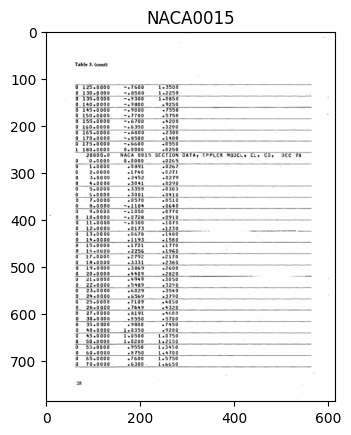

In [50]:

image = cv2.imread( 'naca0015_page_1.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('NACA0015')
plt.show()

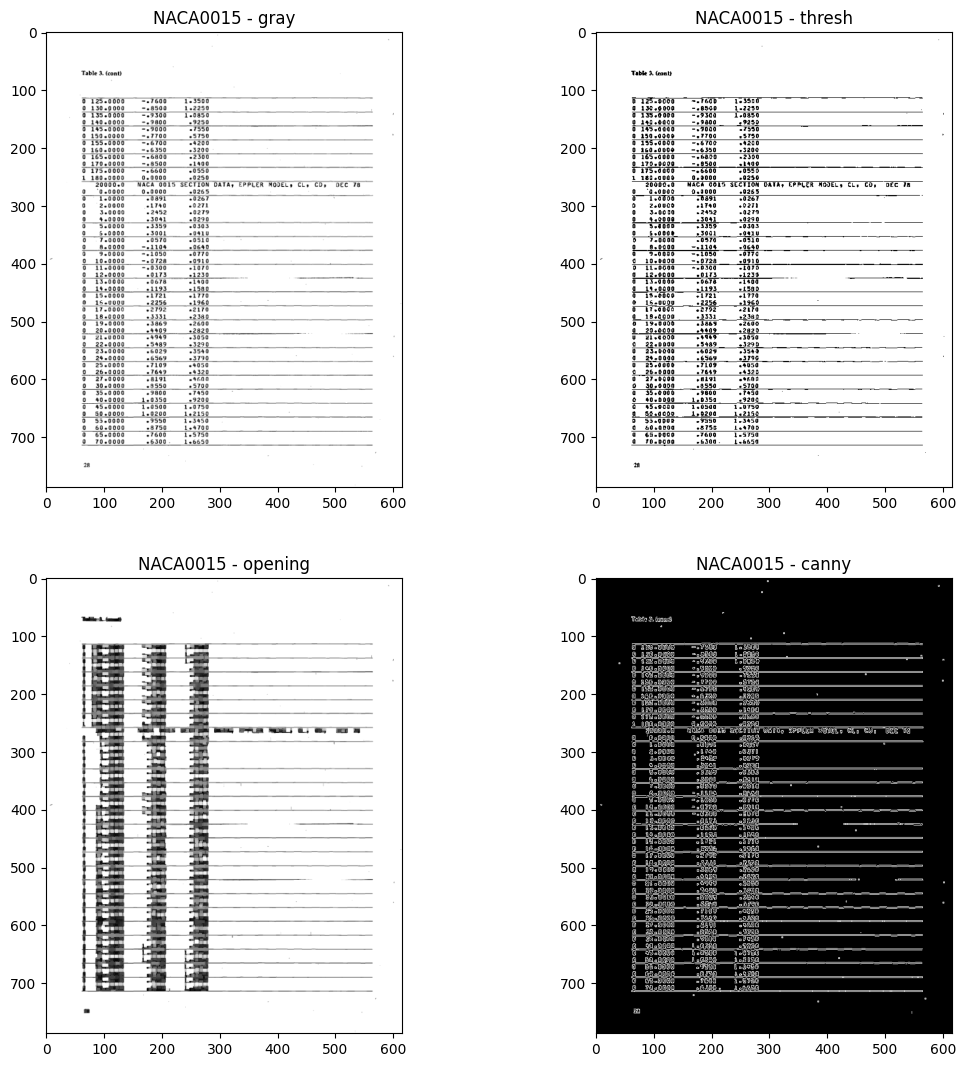

In [51]:


# Preprocess image 

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening, 
          'canny': canny}


# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('NACA0015 - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')    


In [52]:


# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))



-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
Table 3. (cont)
v-1as.0000 =. 7800-13808
9 130.9000 =.8500 1.2250,
0135-0000 =.9300_1-0850, ‘
919020000 -.9800__-9250
9-195-0000- —=-3000 +7380
015020000 27700750, .
‘0-185-0000—=-6700 6200
0 160.0000 __-26350 13200
0-68-0000 =-6800 +2300
917020000 ~28500____ 1400
0-175-000-6600 -0550,
118020000 0.0000 __0250
20000«0 NACA O15 SECTION DATA; EPPLER NOVEL» Cly CD» DEC 7a
0_"o.0000 0.0000 30265
01.0000 0891 0267
0 220000 © Saraa = Coa7a
0 310000 = 2452 Tara
0420000 23002 20290 _
03-0000 +3359 0303,
0__$0000 ¢3001 oan, _ _
07-0000 s0870sos10
982000021108 20640.
09.0000 =-1080 0770
- 91020000 10728 9910.
011-0000 =-0300 +1070
91220000 t0173__ 21230 = _
913.0000 +oe7a~s1900
9 isso000 21193 2asa0
015.0000 s4721 «1 770
© iszv00s 12256 21960.
017-0000 s2792 «2170
9 18s0000 3331, $2380 _
019-0000 +3a69 «2600,
02020000 t4ag9____: 2820
0 a1-v000 +4949. 3050
02220000 ¢54a9__23290.


In [53]:
import cv2
import pytesseract
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

img = cv2.imread('naca0015_page_2.png',0)
img_copy = img.copy()
img_canny = cv2.Canny(img_copy, 50, 100, apertureSize = 3)


In [54]:
img_hough = cv2.HoughLinesP(img_canny, 1, math.pi / 180, 100, minLineLength = 100, maxLineGap = 10)

In [55]:
img_canny

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [56]:
# Berechnung der Hough-Linien
img_hough = cv2.HoughLinesP(img_canny, 1, math.pi / 180, 100, minLineLength = 100, maxLineGap = 10)

# Erstellen einer Kopie des Originalbildes zum Zeichnen der Linien
img_with_lines = img.copy()

# Zeichnen jeder Linie auf das Bild
for line in img_hough:
    x1, y1, x2, y2 = line[0]
    cv2.line(img_with_lines, (x1, y1), (x2, y2), (255, 0, 0), 3)

# Anzeigen des Bildes mit den Linien
plt.imshow(img_with_lines, cmap='gray')
plt.title('Bild mit Hough-Linien')
plt.show()


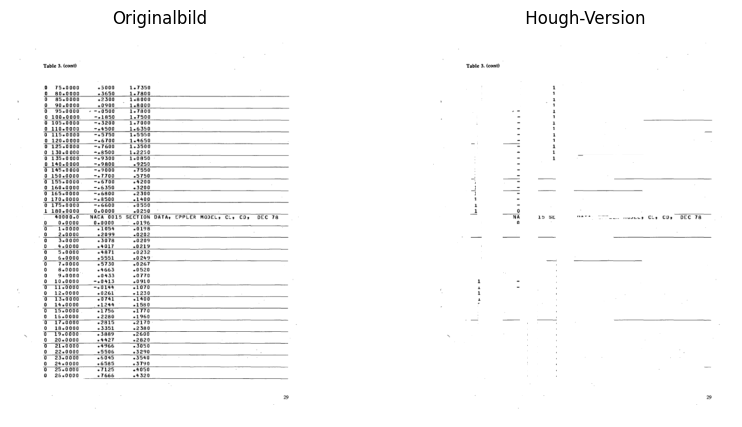

In [30]:
# Erstellen einer Figur mit zwei Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Anzeigen des Originalbildes im ersten Subplot
ax1.imshow(img, cmap='gray')
ax1.set_title('Originalbild')
ax1.axis('off')

# Anzeigen des Bildes mit den Hough-Linien im zweiten Subplot
ax2.imshow(img_with_lines, cmap='gray')
ax2.set_title(' Hough-Version')
ax2.axis('off')

# Anzeigen der Figur
plt.show()


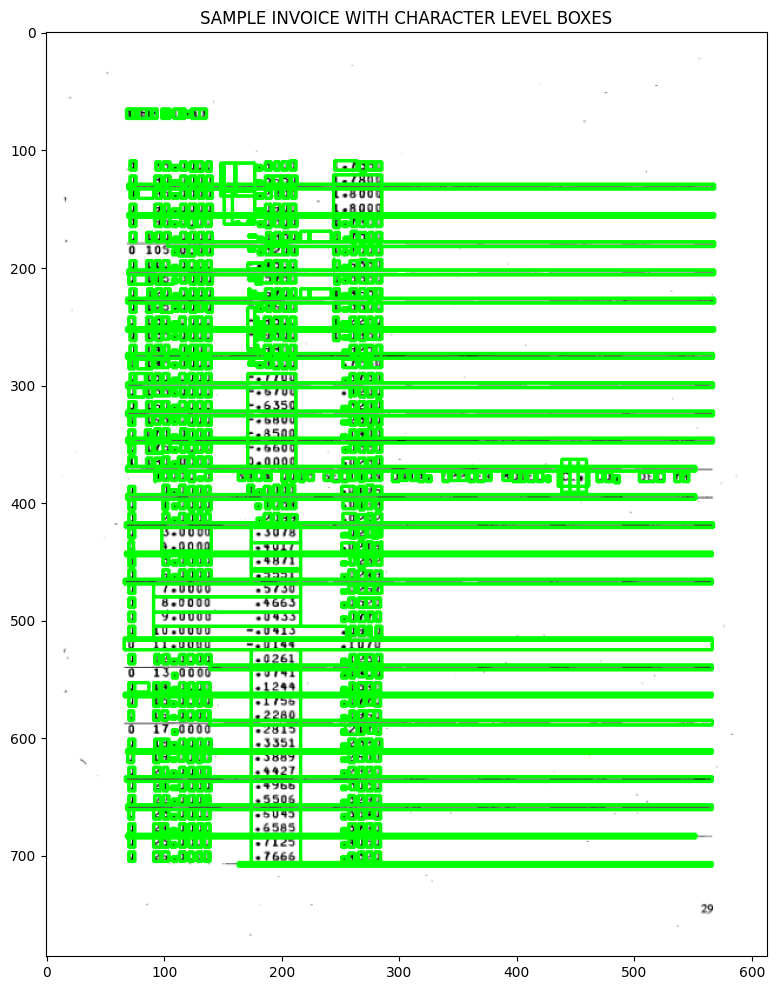

In [31]:

image = cv2.imread('naca0015_page_2.png')
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image) 
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE NACA0015 TABLE CHARACTER LEVEL BOXES')
plt.show()

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


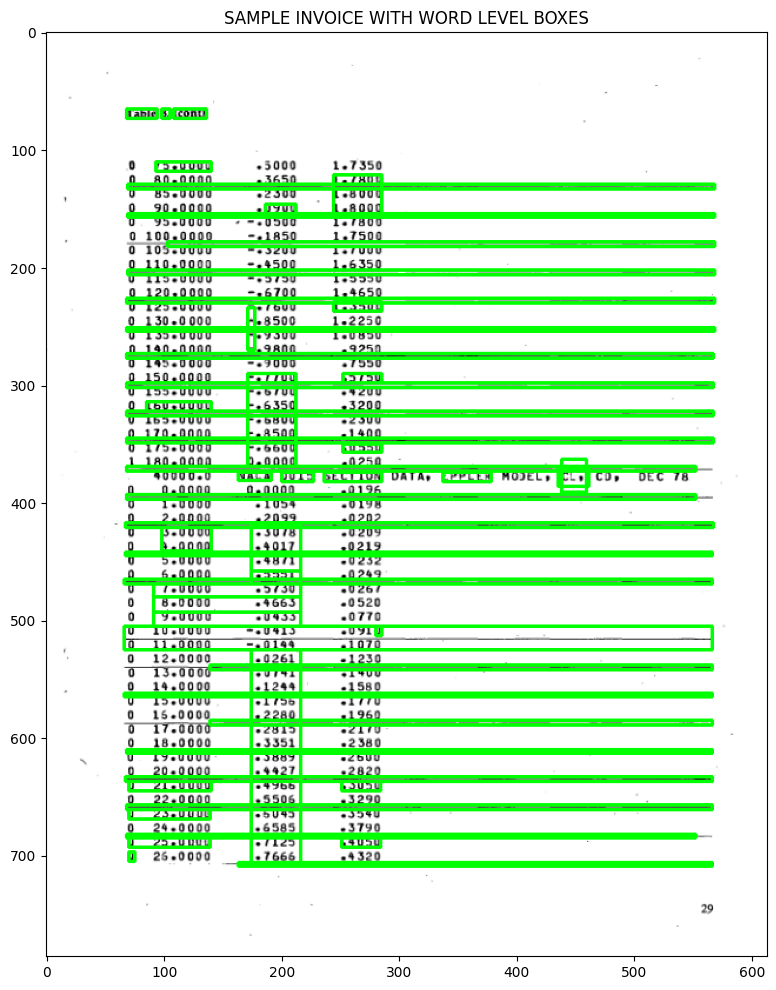

In [32]:
# Plot word boxes on image using pytesseract.image_to_data() function

image = cv2.imread( 'naca0015_page_2.png')
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print('DATA KEYS: \n', d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    # condition to only pick boxes with a confidence > 60%
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH WORD LEVEL BOXES')
plt.show()

In [ ]:

custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

In [33]:


# Plot original image

image = cv2.imread('naca0015_page_2.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('SAMPLE TABLE')
plt.show()



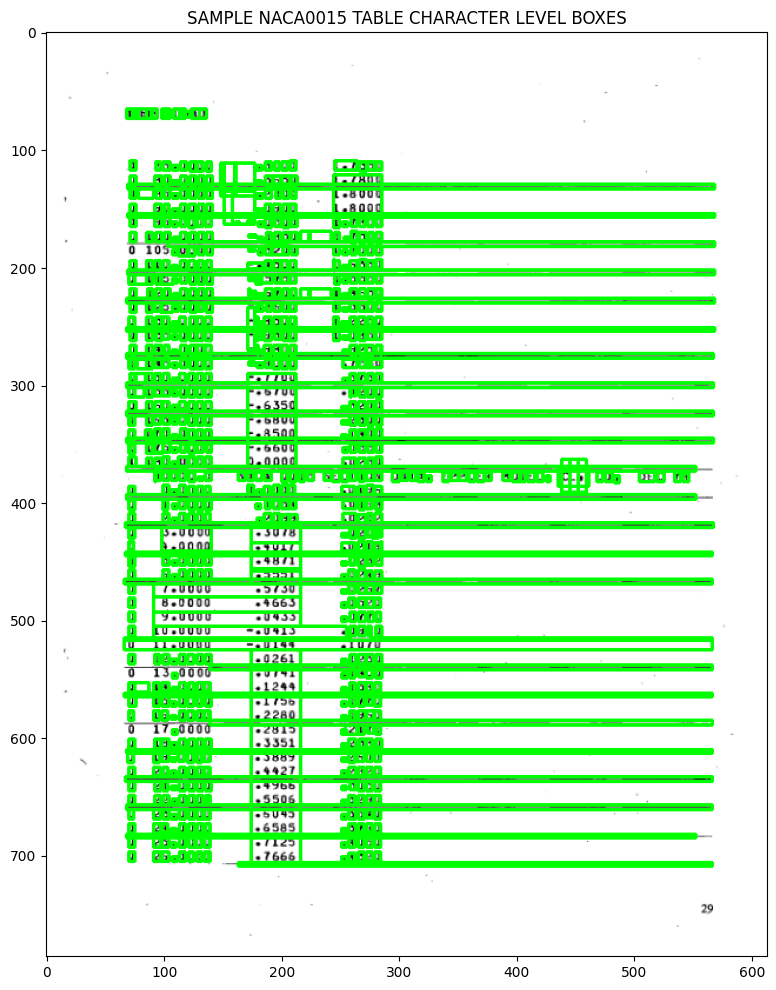

['7 0105 2']
['2']
['34427 22']
['']


In [43]:
import pytesseract
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import re

# Bild mit OpenCV laden
image = cv2.imread('naca0015_page_2.png')

# Bildgröße erhalten
h, w, c = image.shape

# Boxen um die Zeichen zeichnen
boxes = pytesseract.image_to_boxes(image)
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Farbkanäle umkehren für die Darstellung mit matplotlib
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Bild anzeigen
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE NACA0015 TABLE CHARACTER LEVEL BOXES')
plt.show()

# Benutzerdefinierte Konfiguration für Tesseract
custom_config = r'-c tessedit_char_whitelist=0123456789.  --psm 6'

# Text aus dem Bild extrahieren
extracted_text = pytesseract.image_to_string(image, config=custom_config)

# Datenstruktur für die formatierten Daten
formatted_data = []

# Text in Zeilen zerlegen und verarbeiten
lines = extracted_text.split('\n')
for line in lines:
    # Trennung der Zahlen in der Zeile
    numbers = re.split(r'\s{2,}', line)
    formatted_data.append(numbers)

# Ergebnis ausgeben
for row in formatted_data:
    print(row)


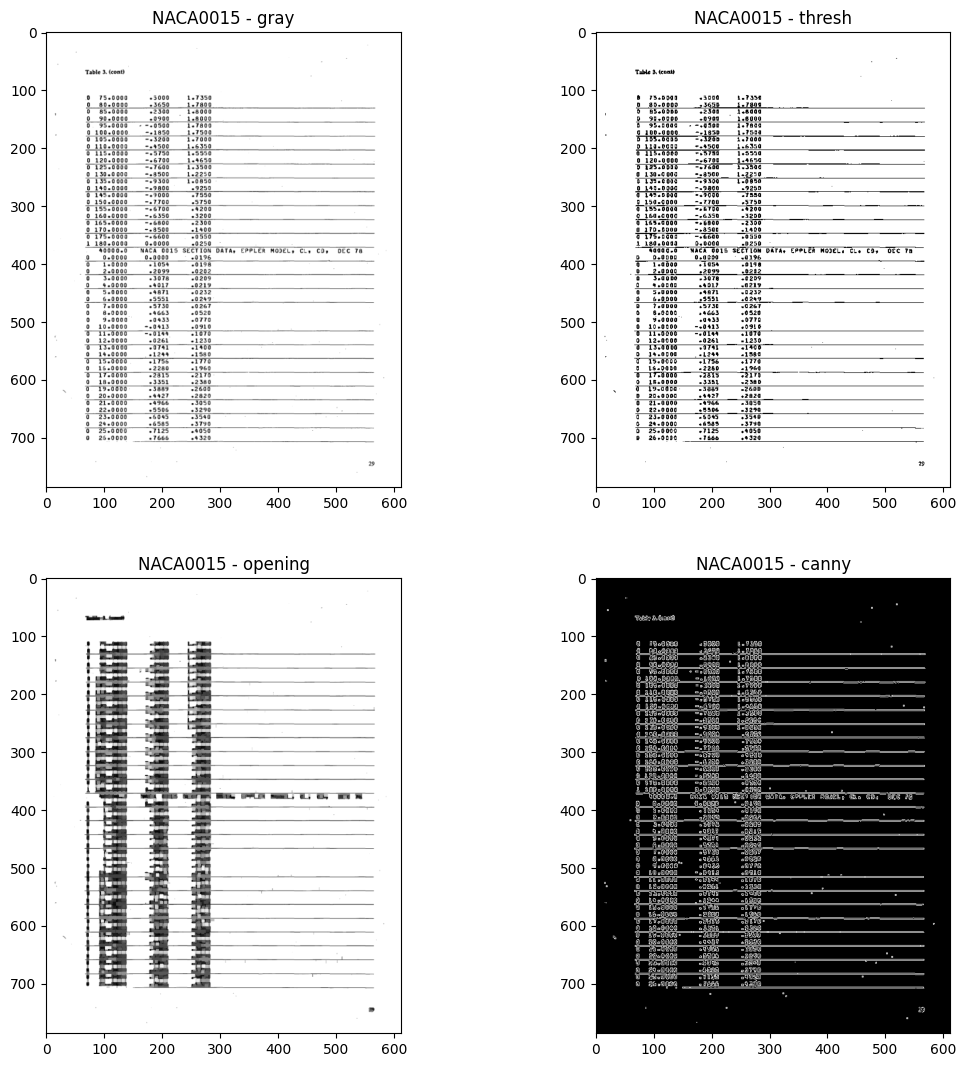

['.']
['2']
['..']
['.']
['.']
['1.']
['']


In [44]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import re

# Funktionen für die Bildvorverarbeitung
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

def opening(image):
    kernel = np.ones((5,5), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

def canny(image):
    return cv2.Canny(image, 100, 200)

# Bild mit OpenCV laden
image = cv2.imread('naca0015_page_2.png')

# Bildvorverarbeitung
gray = get_grayscale(image)
thresh = thresholding(gray)
opening_img = opening(gray) # Öffnungsbild für Textextraktion verwenden
canny_img = canny(gray)

# Bilder zur Darstellung speichern
images = {'gray': gray, 'thresh': thresh, 'opening': opening_img, 'canny': canny_img}

# Bilder anzeigen
fig = plt.figure(figsize=(13,13))
ax = []
rows, columns = 2, 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append(fig.add_subplot(rows, columns, i+1))
    ax[-1].set_title('NACA0015 - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')
plt.show()

# Benutzerdefinierte Konfiguration für Tesseract
custom_config = r'-c tessedit_char_whitelist=0123456789.  --psm 6'

# Text aus dem 'opening'-Bild extrahieren
extracted_text = pytesseract.image_to_string(opening_img, config=custom_config)

# Datenstruktur für die formatierten Daten
formatted_data = []

# Text in Zeilen zerlegen und verarbeiten
lines = extracted_text.split('\n')
for line in lines:
    numbers = re.split(r'\s{2,}', line)
    formatted_data.append(numbers)

# Ergebnis ausgeben
for row in formatted_data:
    print(row)
